# Regression- US Used Car Price Prediction

                        Applied Machine Learning - Project 1 
                          MS Business Analytics- Fall 2021
                   Laxmi Mounika Kalidindi, Sai Sravya Bhupathiraju


Business Objective:
Build a service/tool by utilizing Machine Learning models for estimation of Used car prices based on several characteristics of vehicles. Considered the data of USA and for the vehicles manufactured in the last 10 years from 2010-2021 and built regression model to predict the price

Project Flow:
1. Data understanding and domain knowledge
2. Exploratory Data Analysis
3. Data cleaning/ Pre-processing
4. Model building
5. Model Evaluation and Selection

In [1]:
#import required packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

2. (i) Data Load and Understanding

In [2]:
#Data for Regression is read into a dataframe and displayed first 30 records 
df2 = pd.read_csv('used_cars_data.csv')
df2.head(30)

C:\Users\lxk200008\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
5,SALYK2EX1LA261711,37.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t85614,P250 R-Dynamic S AWD,NaN,AWD,All-Wheel Drive,113.1 in,84.4 in,2020
6,3MZBPABL6KM107908,35.1 in,NaN,NaN,NaN,Sedan,NaN,Bayamon,NaN,NaN,...,A,6-Speed Automatic Overdrive,t85256,Sedan FWD,NaN,FWD,Front-Wheel Drive,107.3 in,70.7 in,2019
7,SALYK2EX5LA275434,37.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t85614,P250 R-Dynamic S AWD,NaN,AWD,All-Wheel Drive,113.1 in,84.4 in,2020
8,SALCJ2FX6LH858128,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
9,SALZL2GX4LH007593,33.8 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t85531,P300 R-Dynamic SE AWD,NaN,AWD,All-Wheel Drive,105.6 in,82.7 in,2020


Dataset contains approximately 1 million records. To work on smaller size of data, split the data and consider only 0.2% of data for analysis. Used train_test split to retain the same distribution of data.

In [3]:
#Splitting of data consider 0.2% of data
from sklearn.model_selection import train_test_split
df1_train, df = train_test_split(df2, test_size = 0.002,random_state = 0)
len(df)
#There are 1993 rows and 66 columns

1993

# Data information

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 467257 to 603431
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vin                      1993 non-null   object 
 1   back_legroom             1923 non-null   object 
 2   bed                      6 non-null      object 
 3   bed_height               253 non-null    object 
 4   bed_length               253 non-null    object 
 5   body_type                1987 non-null   object 
 6   cabin                    28 non-null     object 
 7   city                     1993 non-null   object 
 8   city_fuel_economy        1689 non-null   float64
 9   combine_fuel_economy     0 non-null      float64
 10  daysonmarket             1993 non-null   int64  
 11  dealer_zip               1993 non-null   object 
 12  description              1941 non-null   object 
 13  engine_cylinders         1949 non-null   object 
 14  engine_displaceme

# Exploratory Data Analysis 

From the above information, we could see the type of data
1. String -32 columns
2. Boolean -10 columns
3. Decimal - 8 columns
4. Other- 16 columns
  We need to undertand if the data type is appropriate for each column based on data understanding and accordingly transform the   data.

Analysis on numerical variables to check which are appropriate to include in a model.
1. Ignore analysis of variables which has 100% missing data or the entire column is blank as it has no value
2. Latitude, Longtidue, sp_id, trim_id are numeric by data but cannot be explored or analyzed as numeric data

In [5]:
#Missing data percentage in each column
percent_missing=df.isnull().sum() / df.shape[0] * 100.00
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
#Columns which has 100% missing data
missing_value_df= missing_value_df[missing_value_df['percent_missing'] == 100]
missing_value_df

,column_name,percent_missing
combine_fuel_economy,combine_fuel_economy,100.0
is_certified,is_certified,100.0
vehicle_damage_category,vehicle_damage_category,100.0


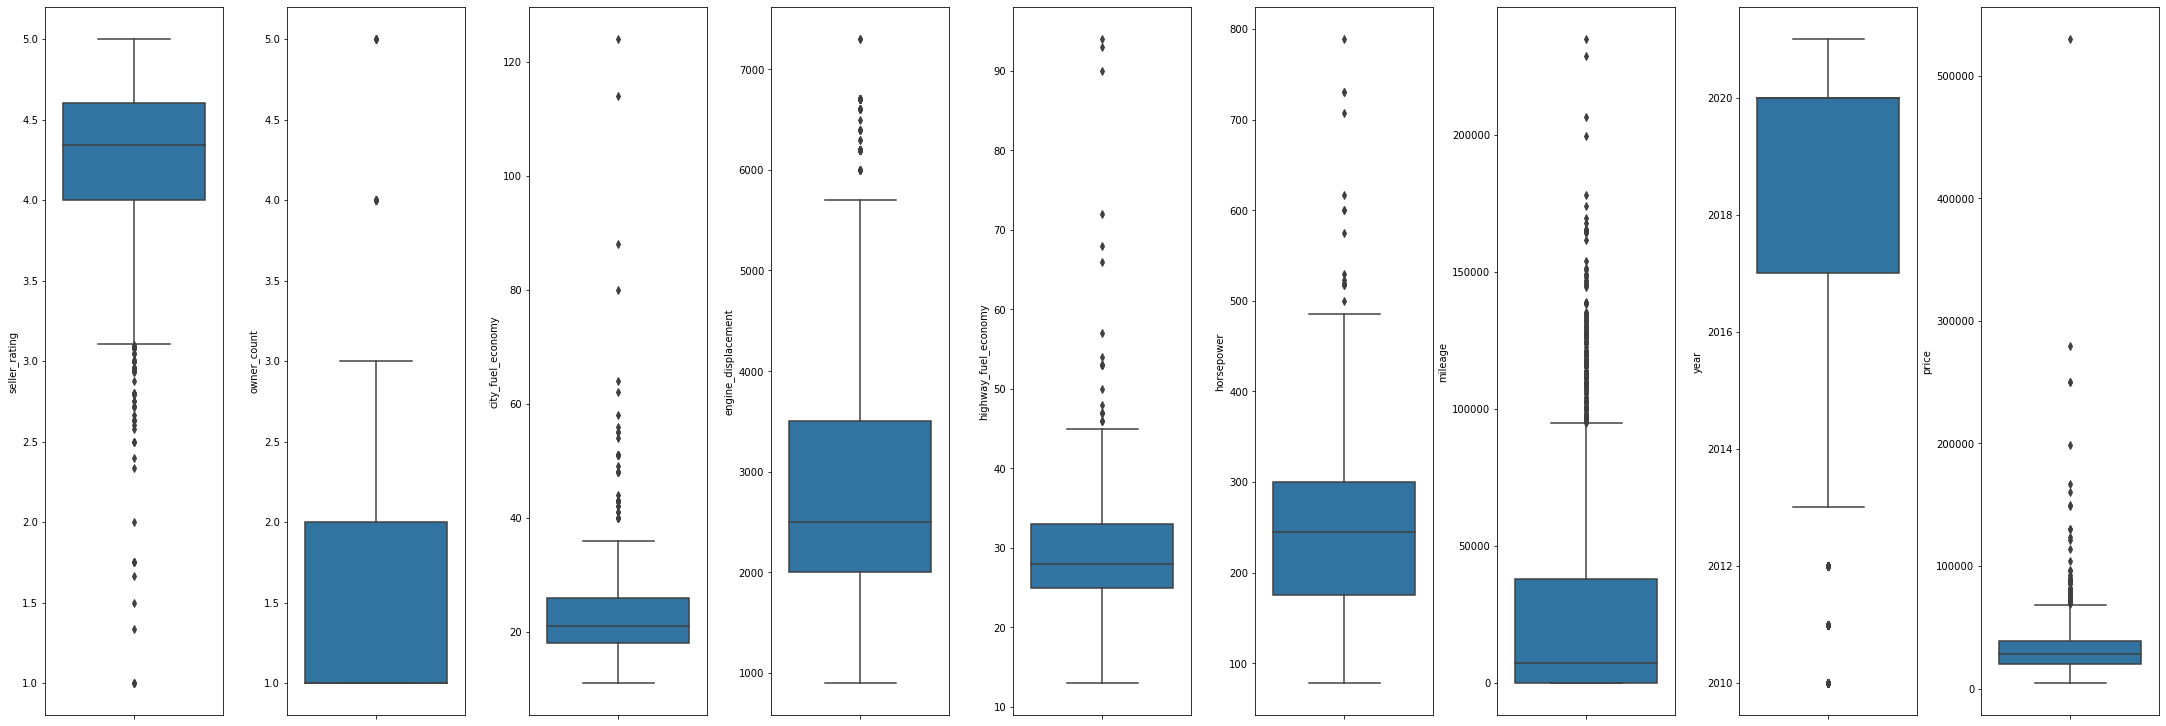

In [6]:
#Exclude those columns above which has no data
numeric = df[["seller_rating","owner_count","city_fuel_economy", "engine_displacement", "highway_fuel_economy", "horsepower", "mileage", "year", "price"]]
fig, axs = plt.subplots(ncols=9, nrows=1, figsize=(30, 10))
index = 0
axs = axs.flatten()
for k,v in numeric.items():
    sns.boxplot(y=k, data=numeric, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Interpretation of distribution of variables from above plots 
1. Seller rating is mostly around 4 to 4.6 with more outliers in the range 2.2 to 3.0
2. Owner count is around 1 to 2 which means there are no vehicles with more than 2 owners. Except for three outliers which has 4to6 owners
3. Mileage column has extreme values which may be for specific vehicles(outliers)
4. Price variable some very high values
5. Year column says most of the vehicles are manufactured around 2017 to 2021.
All the exceptional high values for horse_power, price and engine_displacement may be for sports cars or highly expensive cars.

Correlation among numerical variables and check how all numerical variables are related to price variable

<AxesSubplot:>

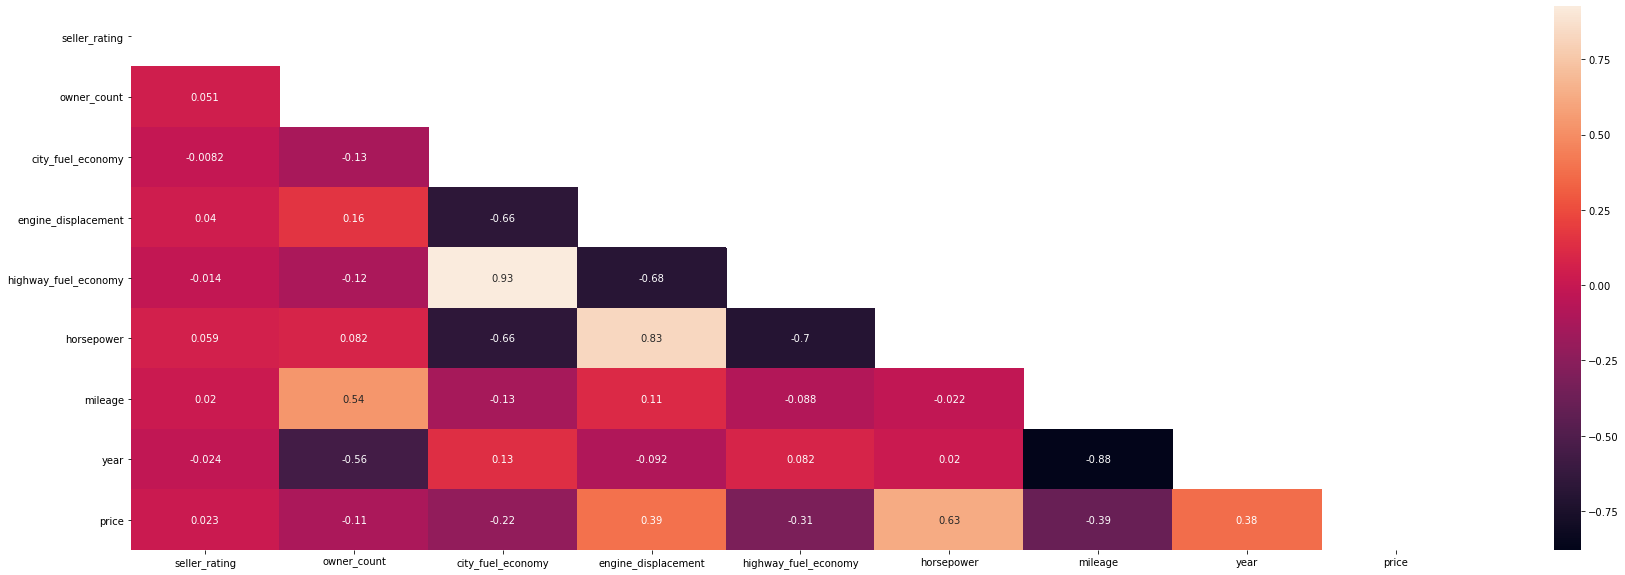

In [7]:
plt.figure(figsize=(30, 10))
correlation = numeric.corr()
matrix = np.triu(correlation)
sns.heatmap(correlation,  annot=True, mask=matrix)

1. From the above correlation plot, we could see there is highest coorelation between price and horsepower and price and year which means price is high for vehicles with more horse power and new vehicles
2. Other numeric variables has relevant correlation with price except seller rating and owner_count for which there is least correlation and might not add value in predicting the price.
3. 

           Analysis of Categorical variables
Ignore those variables which has very high percentage of missing data which will later be removed from the model
Ignore those variables which has no meaning for the data or to estimate the price which will later be removed

In [8]:
#To check which columns are read as categorical/stringfrom dataset
{column: len(df[column].unique()) for column in df.columns if df.dtypes[column] == 'object'}

{'vin': 1993,
 'back_legroom': 127,
 'bed': 4,
 'bed_height': 2,
 'bed_length': 33,
 'body_type': 10,
 'cabin': 5,
 'city': 853,
 'dealer_zip': 1104,
 'description': 1939,
 'engine_cylinders': 22,
 'engine_type': 22,
 'exterior_color': 632,
 'fleet': 3,
 'frame_damaged': 3,
 'franchise_make': 34,
 'front_legroom': 66,
 'fuel_tank_volume': 117,
 'fuel_type': 8,
 'has_accidents': 3,
 'height': 227,
 'interior_color': 398,
 'isCab': 3,
 'is_cpo': 2,
 'is_oemcpo': 2,
 'length': 325,
 'listed_date': 324,
 'listing_color': 14,
 'main_picture_url': 1722,
 'major_options': 1225,
 'make_name': 41,
 'maximum_seating': 12,
 'model_name': 319,
 'power': 331,
 'salvage': 3,
 'sp_name': 1615,
 'theft_title': 3,
 'torque': 324,
 'transmission': 5,
 'transmission_display': 22,
 'trimId': 1309,
 'trim_name': 629,
 'wheel_system': 6,
 'wheel_system_display': 6,
 'wheelbase': 201,
 'width': 171}

1. From the above string type of variables, some should be ignored as they are not relevant/needed for estmating price which will later be dropped
2. vin-Vehicle Identification number, Description, Listing ID, Dealer_zip, City, main picture url, sp_id,sp_name(dealer name), trimID
3. Some other variables such as back_legroom,wheel_base,width as read but are actually numerical. They are read as string because of inches as suffix to the data.
4. One of the variable out of wheel system display and Wheel_system can be later dropped as both has same data(one with abbreviation and other with full form)
5. One of the variable out of transmission display and transmission can be later dropped as both has same data(one with abbreviation and other with full form)

C:\Users\lxk200008\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lxk200008\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lxk200008\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lxk200008\

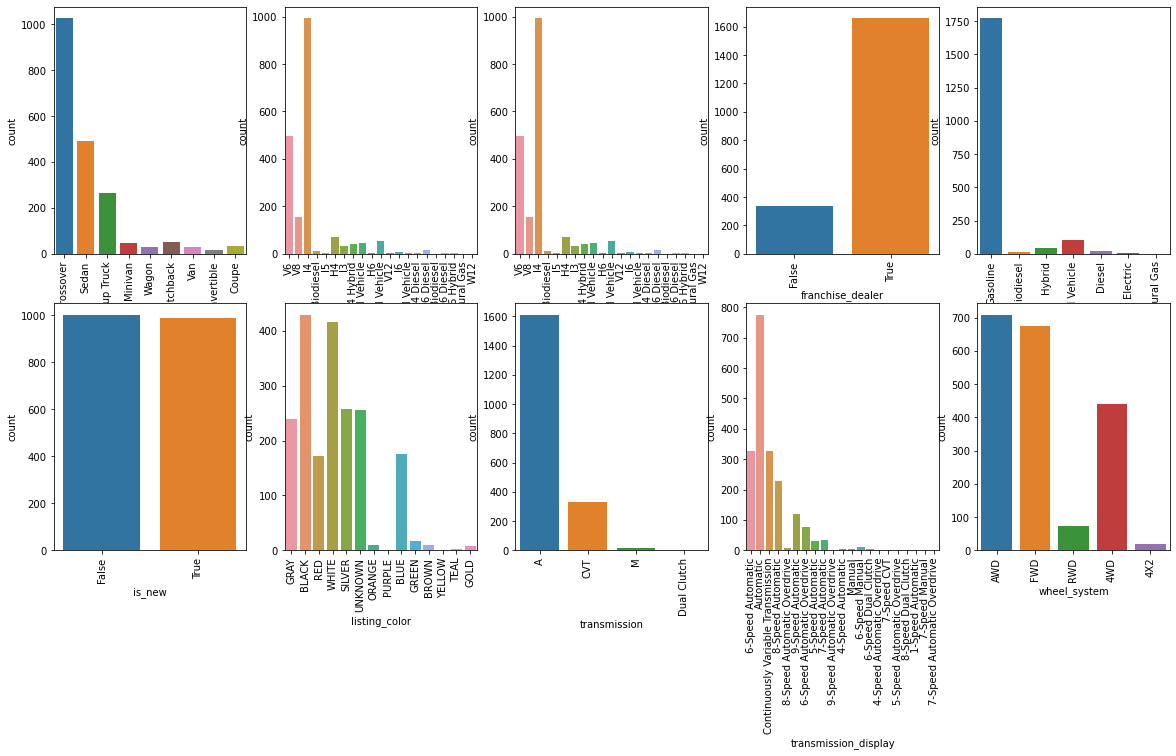

In [9]:
categorical = [
  'body_type', 'engine_type', 'engine_cylinders','franchise_dealer',
    'fuel_type','is_new','listing_color','transmission','transmission_display','wheel_system'
]
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

For the above categorical variables, Fuel type "Gasoline" and Transmission type "Automatic" as we considered US data and majority of the vehicles are gasoline Automatic vehicles. Also, engine_cylinders and engine_type gives the same information and one of the variables can be dropped later.

Transmission_display has the data combination of transmission and speed(may be number of gears or top speed), so numeric part should be extracted as the text part transmission type is already available in "transmission" column.

There are few records which are electric vehicles with fuel_type electric. We need to handle these records as special cases anf fill the missing data for variables engine_type, horsepower, engine_displacement,fuel_tank_volume and transmission_display accorindgly but not with mode. Instead we should give names exclusively. 


# Data cleaning/ Pre processing

1. Deletion of data - missing data, irrelevant data , duplicate/redundant data
(i) drop the columns with almost 50% of missing data

In [10]:
percent_missing=df.isnull().sum() / df.shape[0] * 100.00
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
#Columns which has more than 45% missing data
missing_value_df= missing_value_df[missing_value_df['percent_missing'] > 45]
missing_value_df

,column_name,percent_missing
bed,bed,99.698946
bed_height,bed_height,87.305569
bed_length,bed_length,87.305569
cabin,cabin,98.595083
combine_fuel_economy,combine_fuel_economy,100.000000
fleet,fleet,48.218766
frame_damaged,frame_damaged,48.218766
has_accidents,has_accidents,48.218766
isCab,isCab,48.218766
is_certified,is_certified,100.000000


Drop the columns based on missing percentage- drop columns with almost 50% of data missing 

In [11]:
null_columns = df.columns[df.isnull().sum() / df.shape[0] * 100.00 >45]
df = df.drop(null_columns,axis=1)

Drop below columns which are irrelevant based on data understanding and which does not account to  Price estimation
Vin- Vehicle Identification number
Description
Listing ID from the website
Dealer_zip
City
main picture url
sp_id
trimID
sp_name
trim_name
longitude
latitude


In [12]:
irrelevant_columns = df[['vin','description','listing_id','dealer_zip','city',
                         'main_picture_url','sp_id','sp_name','trimId','sp_name','trim_name','longitude','latitude']]
df.drop(irrelevant_columns,axis=1,inplace=True)

Drop columns with redundant and duplicate data
1. Engine Type/Engine Cylinders
2. Wheel system/Wheel System display
3. Drop franchise make and retain franchise_dealer

In [13]:
redundant_cols= df[['engine_cylinders','wheel_system_display','franchise_make','exterior_color','interior_color','major_options']]
df.drop(redundant_cols,axis=1,inplace=True)

Feature Engineering/New extracted columns
1. Transmission display to be extracted as speed/gears with only numerical part
2. City fuel economy and Highway fuel economy should be weighted into one variable as combined_fuel_economy
3. Age of vehicle from the difference of year and listing_date
4. Remove text unit_type "in" for the columns back_legroom,front_legroom,height, length,wheelbase,width and convert to float datatype
5. Remove text "seats" from maximum_seating column and convert to int datatype
6. Column fuel_tank_volume should be converted to float datatype by removing the unit type "gal" in the data
7. Variable Power and Torque which are expressed as text with two terms "power and rpm" in the data for each variable.
Split data in power to horse_p and power_rpm; split torque into torque_p and torque_rpm

In [14]:
#1.Transmission_display 
#different categories and most frequently occuring categories can be seen below
count1 = df['transmission_display'].value_counts()
count1

Automatic                             775
6-Speed Automatic                     327
Continuously Variable Transmission    327
8-Speed Automatic                     227
9-Speed Automatic                     121
6-Speed Automatic Overdrive            76
7-Speed Automatic                      35
5-Speed Automatic                      29
6-Speed Manual                         12
8-Speed Automatic Overdrive             6
4-Speed Automatic                       5
Manual                                  4
6-Speed Dual Clutch                     3
7-Speed CVT                             2
1-Speed Automatic                       2
5-Speed Automatic Overdrive             2
9-Speed Automatic Overdrive             2
7-Speed Automatic Overdrive             1
8-Speed Dual Clutch                     1
4-Speed Automatic Overdrive             1
7-Speed Manual                          1
Name: transmission_display, dtype: int64

We need the integer part of the columns beacuse the text part is already available in "transmission" column. But there are two values which does not have integer part and we need to impute most frequent value to those categories 
"Continously Variable transmission","Automatic" and "Manual"
We have "6" as most frequent for all the data, So, impute 6 for above three categories, extract integer part for entire column and convert to integer type

In [15]:
#1. Assign values
dictionary = {"Automatic": "6", "Continuously Variable Transmission": "6", "Manual": "6"}
df["transmission_display"].replace(dictionary, inplace=True)

#Extract integer part and convert to float
df["transmission_display"] = df["transmission_display"].str.extract('(\d+)', expand=False).astype("float")

In [16]:
#2. combined fuel economy is weighted average of city and highway fuel economy  
#combined= 0.55*city_fuel_economy+0.45*highway_fuek_economy
df['combined_fuel_economy']=0.55*df['city_fuel_economy']+0.45*df['highway_fuel_economy']
#drop the columns
df.drop("city_fuel_economy",axis=1,inplace=True)
df.drop("highway_fuel_economy",axis=1,inplace=True)

In [17]:
# 3. age of the vehicle
df['listed_date'] = df['listed_date'].apply(pd.to_datetime)
df['age']= df['listed_date'].dt.year- df['year']
#drop the columns
df.drop("listed_date",axis=1,inplace=True)
df.drop("year",axis=1,inplace=True)

In [18]:
#4,5,6 Remove text unit_type "in" for the columns back_legroom,front_legroom,height, length,wheelbase,width
#maximum_seating,fuel_tank_volume and convert to float datatype
df["fuel_tank_volume"] = df["fuel_tank_volume"].str.extract('(\d+)', expand=False).astype("float")
df["maximum_seating"] = df["maximum_seating"].str.extract('(\d+)', expand=False).astype("float")
df["back_legroom"] = df["back_legroom"].str.extract('(\d+)', expand=False).astype("float")
df["front_legroom"] = df["front_legroom"].str.extract('(\d+)', expand=False).astype("float")
df["height"] = df["height"].str.extract('(\d+)', expand=False).astype("float")
df["length"] = df["length"].str.extract('(\d+)', expand=False).astype("float")
df["wheelbase"] = df["wheelbase"].str.extract('(\d+)', expand=False).astype("float")
df["width"] = df["width"].str.extract('(\d+)', expand=False).astype("float")

In [19]:
#7. Torque and Power
#Extracted numeric part of torque variable and stored in two variables
df["torque"] = df["torque"].str.replace(",","").astype("str")
df["torque"] = df["torque"].apply(lambda x: [int(i) for i in x.split() if i.isdigit()])
df["torque"] = [x if len(x) == 2 else [0,0] for x in df["torque"]]
#Extracted numeric part of power variable and stored in two variables
df["power"] = df["power"].str.replace(",","").astype("str")
df["power"] = df["power"].apply(lambda x: [int(i) for i in x.split() if i.isdigit()])
df["power"] = [x if len(x) == 2 else [0,0] for x in df["power"]]

#Four new variables 
df["torque_p"] = [x[0] for x in df["torque"]]
df["torque_rpm"] = [x[1] for x in df["torque"]]
df["horse_p"] = [x[0] for x in df["power"]]
df["power_rpm"] = [x[1] for x in df["power"]]

In [20]:
#after extraction, we could observe that newly extracted horse_p is similar to horse_power in actual data
#so drop horse_p and retain actual variable "horsepower" 
df.drop("horse_p",axis=1,inplace=True)
df.drop("torque",axis=1,inplace=True)
df.drop("power",axis=1,inplace=True)

# Imputation- Handle null data


In [21]:
#Columns which has atleast one missing value
percent_missing=df.isnull().sum() / df.shape[0] * 100.00
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
#Columns which has more than 45% missing data
missing_value_df= missing_value_df[missing_value_df['percent_missing'] !=0]
missing_value_df 

,column_name,percent_missing
back_legroom,back_legroom,6.221776
body_type,body_type,0.301054
engine_displacement,engine_displacement,4.214752
engine_type,engine_type,2.207727
front_legroom,front_legroom,4.365278
fuel_tank_volume,fuel_tank_volume,3.562469
fuel_type,fuel_type,1.956849
height,height,3.562469
horsepower,horsepower,4.214752
length,length,3.562469


Check for non imputable columns
Categorical columns- If there is no meaning in imputing the model for missing values, we will categorize those rows as "unknown" category
Continuous columns- If there is no meaning in imputing the model for missing values, we will check the percentage of missing records and delete those rows instead of imputing irrelevant technique which may result in biased/incorrect results

Impute Categorical variables
1. Deal Electric vehicles separately as special cases before imputing data
2. body_type
2. engine_type
3. fuel_type
4. transmission
5. wheel_system

Electric vehicles for which fuel_type is electric.Below columns will be definitely empty for these records.So these rows should be first imputed before dealing with all other missing values
Assign engine_type as "electric"; transmission_display as "6" as 6 gears is most common; horse_power, engine_displacement, fuel_tank_volume can be replaced by mean of those columns.

In [22]:
#1. 
df.loc[df["fuel_type"] == "Electric", "engine_type"] = "Electric"
df.loc[df["fuel_type"] == "Electric", "transmission_display"] = 6 #median of transmission display
df.loc[df["fuel_type"] == "Electric", "horsepower"] = df.horsepower.mean()
df.loc[df["fuel_type"] == "Electric", "engine_displacement"] = df.engine_displacement.mean()
df.loc[df["fuel_type"] == "Electric", "fuel_tank_volume"] = df.fuel_tank_volume.mean()

In [23]:
#2. Body type of the vehicle depends on the manufacturer and the model of the vehicle. So we find the most frequent body type for 
#same make and model and impute into na values
mode_body = df.groupby(['make_name','model_name']).body_type.apply(lambda x: x.mode()).to_frame(name="mode").reset_index()
#merged both dataframes to get mode for each make and model
df = (df.merge(mode_body, on=["make_name", "model_name"]))

#Assign the data in model column to the rows which has null values in body_type column
df['body_type'] = np.where(df['body_type'].isna(), df['mode'], df['body_type'])

#Drop the unneeded columns
df = df.drop(["mode","level_2"], axis=1)

In [24]:
#3. Engine_type of the vehicle depends on the manufacturer and the model of the vehicle. So we find the most frequent engine type for 
#same make and model and impute into na values
mode_engine_type = df.groupby(['make_name','model_name']).engine_type.apply(lambda x: x.mode()).to_frame(name="mode").reset_index()
#merged both dataframes to get mode for each make and model
df = (df.merge(mode_engine_type, on=["make_name", "model_name"]))

#Assign the data in model column to the rows which has null values in engine_type column
df['engine_type'] = np.where(df['engine_type'].isna(), df['mode'], df['engine_type'])

#Drop the unneeded columns
df = df.drop(["mode","level_2"], axis=1)

In [25]:
#4. Fuel type of the vehicle depends on the manufacturer and the model of the vehicle. So we find the most frequent fuel type for 
#same make and model and impute into na values
mode_fuel = df.groupby(['make_name','model_name']).fuel_type.apply(lambda x: x.mode()).to_frame(name="mode").reset_index()
#merged both dataframes to get mode for each make and model
df = (df.merge(mode_fuel, on=["make_name", "model_name"]))

#Assign the data in model column to the rows which has null values in fuel_type column
df['fuel_type'] = np.where(df['fuel_type'].isna(), df['mode'], df['fuel_type'])

#Drop the unneeded columns
df = df.drop(["mode","level_2"], axis=1)

In [26]:
#5. Transmission depends on the manufacturer and the model of the vehicle. So we find the most frequent transmission for 
#same make and model and impute into na values
mode_transmission = df.groupby(['make_name','model_name']).transmission.apply(lambda x: x.mode()).to_frame(name="mode").reset_index()
#merged both dataframes to get mode for each make and model
df = (df.merge(mode_transmission, on=["make_name", "model_name"]))

#Assign the data in model column to the rows which has null values in body_type column
df['transmission'] = np.where(df['transmission'].isna(), df['mode'], df['transmission'])
#Drop the unneeded columns
df = df.drop(["mode","level_2"], axis=1)


In [27]:
#5. wheel_system of the vehicle depends on the manufacturer and the model of the vehicle. So we find the most frequent wheel_system for 
#same make and model and impute into na values
mode_wheel = df.groupby(['make_name','model_name']).wheel_system.apply(lambda x: x.mode()).to_frame(name="mode").reset_index()
#merged both dataframes to get mode for each make and model
df = (df.merge(mode_wheel, on=["make_name", "model_name"]))

#Assign the data in model column to the rows which has null values in body_type column
df['wheel_system'] = np.where(df['wheel_system'].isna(), df['mode'], df['wheel_system'])

#Drop the unneeded columns
df = df.drop(["mode","level_2"], axis=1)

Numerical variables-
1. Delete all the records for which mileage is null. This is because, mileage is an important variable and imputation might result in biased results. As missing is only 5% for mileage, remove all the rows with null values
2. Impute the missing data with mean by grouping different categories 

In [28]:
df = df.dropna( how='any',subset=['mileage'])

In [29]:
#back_legroom and front_legroom, length, width and height and maximum seating columns depend on make, model and body type of vehicle.
#so we need to impute these values with mean by aggregrating for make,model and body type
df['back_legroom']=df.groupby(['make_name','model_name','body_type'])['back_legroom'].apply(lambda x:x.fillna(x.mean()))
df['front_legroom']=df.groupby(['make_name','model_name','body_type'])['front_legroom'].apply(lambda x:x.fillna(x.mean()))
df['height']=df.groupby(['make_name','model_name','body_type'])['height'].apply(lambda x:x.fillna(x.mean()))
df['length']=df.groupby(['make_name','model_name','body_type'])['length'].apply(lambda x:x.fillna(x.mean()))
df['width']=df.groupby(['make_name','model_name','body_type'])['width'].apply(lambda x:x.fillna(x.mean()))
df['wheelbase']=df.groupby(['make_name','model_name','body_type'])['wheelbase'].apply(lambda x:x.fillna(x.mean()))
df['maximum_seating']=df.groupby(['make_name','model_name','body_type'])['maximum_seating'].apply(lambda x:x.fillna(x.mean()))

# average horse power depends on engine_type,fuel_type,make_name, model_name
df['horsepower']=df.groupby(['engine_type','fuel_type','make_name','model_name'])['horsepower'].apply(lambda x:x.fillna(x.mean()))

#average combined fuel economy depends on body_type, engine_type, fuel_type, horsepower, make_name and model_name and age
df['combined_fuel_economy']=df.groupby(['body_type','engine_type','fuel_type','horsepower','make_name','model_name','age'])['combined_fuel_economy'].apply(lambda x:x.fillna(x.mean()))

#Average engine displacement depends on engine_type, fuel_type, make_name and model_name and age
df['engine_displacement']=df.groupby(['body_type','engine_type','fuel_type','make_name','model_name','age'])['engine_displacement'].apply(lambda x:x.fillna(x.mean()))

#Average fuel tank volume depends on manufacturer, model and manufactured year(age) 
df['fuel_tank_volume']=df.groupby(['make_name','model_name','age'])['fuel_tank_volume'].apply(lambda x:x.fillna(x.mean()))



In [30]:
df['front_legroom'].fillna(value=df['front_legroom'].mean(), inplace=True)
df['back_legroom'].fillna(value=df['front_legroom'].mean(), inplace=True)
df['height'].fillna(value=df['height'].mean(), inplace=True)
df['length'].fillna(value=df['length'].mean(), inplace=True)
df['width'].fillna(value=df['width'].mean(), inplace=True)
df['maximum_seating'].fillna(value=df['maximum_seating'].mean(), inplace=True)
df['wheelbase'].fillna(value=df['wheelbase'].mean(), inplace=True)
df['engine_displacement'].fillna(value=df['engine_displacement'].mean(), inplace=True)
df['fuel_tank_volume'].fillna(value=df['fuel_tank_volume'].mean(), inplace=True)
df['horsepower'].fillna(value=df['horsepower'].mean(), inplace=True)
df['transmission_display'].fillna(value=df['transmission_display'].median(), inplace=True)
df['combined_fuel_economy'].fillna(value=df['combined_fuel_economy'].median(), inplace=True)
df['seller_rating'].fillna(value=df['seller_rating'].median(), inplace=True)



In [33]:
#As there are many similar categories for engine_type, assign the data into similar buckets
dict = {"I4 Hybrid": "I4", "I4 Diesel": "I4", "I4 Flex Fuel Vehicle": "I4", "V6 Hybrid": "V6", "V6 Biodiesel": "V6" ,
              "V6 Flex Fuel Vehicle": "V6", "V8 Flex Fuel Vehicle": "V8", "I6 Diesel": "I6", "I6 Biodiesel": "I6", "V6 Diesel": "V6", 
              "H4 Hybrid": "H4", "W12 Flex Fuel Vehicle": "W12", "V8 Hybrid": "V8", "I4 Compressed Natural Gas": "I4", "I6 Hybrid": "I6",
              "V6 Compressed Natural Gas": "V6", "V8 Biodiesel": "V8", "V8 Diesel": "V8", "I5 Biodiesel": "I5", "V8 Compressed Natural Gas": "V8",
              "I5 Diesel": "I5", "V8 Propane": "V8", "I3 Hybrid": "I3", "V10 Diesel": "V10", "V12 Hybrid": "V12"}
df["engine_type"].replace(dict, inplace=True)
del dict

In [43]:
#Categorize the manufacturers into five categories based on luxury and availibility of vehicles
dict1 = {"Ford":"More_available","Chevrolet":"More_available","Honda":"More_available","Nissan":"More_available","Toyota":"More_available","Jeep":"More_available","Hyundai":"More_available", 
         "Subaru": "Average","Kia":"Average","Honda":"Average","RAM":"Average","Mercedes-Benz":"Average","GMC":"Average","Dodge":"Average","BMW":"Average","Mazda": "Average", 
         "Lexus":"Luxury","Volkswagen":"Luxury","Audi":"Luxury","Chyrsler":"Luxury","Buick":"Luxury","Cadillac":"Luxury","Volvo":"Luxury","Lincoln":"Luxury","Mitsubishi":"Luxury","INFINITI":"Luxury","Acura":"Luxury",
         "Land Rover":"Rare","Jaguar":"Rare","MINI":"Rare","Porsche":"Rare","Maserati":"Rare","Ferrari":"Rare","smart":"Rare","FIAT":"Rare","Genesis":"Rare","Rolls-Royce":"Rare","Alfa Romeo":"Rare","Suziki":"Rare","Tesla":"Rare","Aston Martin":"Rare"}
df["make_name"].replace(dict1, inplace=True)
del dict1

In [44]:
cols=pd.get_dummies(df["engine_type"],prefix="engine_type")
df[cols.columns]=cols
df.drop("engine_type",axis=1,inplace=True)
cols=pd.get_dummies(df["fuel_type"],prefix="fuel_type")
df[cols.columns]=cols
df.drop("fuel_type",axis=1,inplace=True)
cols=pd.get_dummies(df["body_type"],prefix="body_type")
df[cols.columns]=cols
df.drop("body_type",axis=1,inplace=True)
cols=pd.get_dummies(df["transmission"],prefix="transmission")
df[cols.columns]=cols
df.drop("transmission",axis=1,inplace=True)
cols=pd.get_dummies(df["wheel_system"],prefix="wheel_system")
df[cols.columns]=cols
df.drop("wheel_system",axis=1,inplace=True)
cols=pd.get_dummies(df["listing_color"],prefix="listing_color")
df[cols.columns]=cols
df.drop("listing_color",axis=1,inplace=True)
cols=pd.get_dummies(df["make_name"],prefix="make_name")
df[cols.columns]=cols
df.drop("make_name",axis=1,inplace=True)


# Model building

In [80]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [81]:
#Standard scaling using Standard Scaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('price', axis = 1)
y = df['price']

X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

# Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('train: ', lreg.score(X_train, y_train))
print('test: ', lreg.score(X_test, y_test))


train:  0.8283053922174043
test:  -3.0051744001610107e+18


In [83]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#Cross validation with five folds
cv_scores = cross_val_score(lreg, X_train, y_train,cv = 5)
cv_test_scores = cross_val_score(lreg, X_test, y_test,cv = 5)

#Cross validation - mean of train and test scores
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))

Mean cross-validation training score (5-fold): -340586941844716650496.0000
Mean cross-validation testing score (5-fold): -94986393061385071230976.0000


Above linear regression could be inappropriate as the test score is negative and extremely high. Also the cross validation seems incorrect

# Lasso Regression

In [84]:
from sklearn.linear_model import Lasso
for alpha in [1, 10, 100, 1000]:
    lasso = Lasso(random_state = 0, alpha = alpha, max_iter = 10000)
    lasso.fit(X_train, y_train)
    print('alpha: ', alpha)
    print(lasso.coef_)

alpha:  1
[-1.09570134e+04 -2.58620973e+04  1.31471599e+04  1.14057400e+05
  4.07078170e+03 -4.29487290e+03 -1.24904013e+04 -1.75822204e+04
 -6.57787368e+03  6.45353898e+03 -5.53805846e+03 -1.94833989e+04
 -4.60328845e+03  3.12651260e+03 -1.31611465e+03  2.80185407e+03
 -1.11295510e+03  7.87843995e+03 -4.08384444e+03 -2.74123660e+03
 -4.96191794e+03  1.00598100e+04  2.17257363e+05 -4.55924504e+03
  3.25293749e+03  0.00000000e+00  0.00000000e+00  2.95456898e+03
  1.54774213e+02 -8.50932599e+03 -4.69136536e+03 -0.00000000e+00
  1.87521644e+04  4.75222252e+03  2.12100860e+03 -1.03646171e+03
 -8.05260369e+03 -0.00000000e+00 -1.89360673e+02  8.69879894e+03
 -5.81320447e+02  4.17760266e+02 -2.52431863e+01  2.17824911e+03
 -3.72916174e+03  3.76126127e+03 -5.79059320e+03  2.25015848e+03
  7.95594273e+01 -9.89962558e+03  4.93475693e+02 -5.99282231e+02
  5.44744124e+02  1.97272248e+03 -0.00000000e+00 -4.30420481e+03
  3.27777982e+03  0.00000000e+00 -5.04457335e+02 -9.27617215e+02
  4.26986276e+0

In [85]:
lasso = Lasso(alpha = 1000, random_state= 0)
lasso.fit(X_train, y_train)
print('train: ', lasso.score(X_train, y_train))
print('test: ', lasso.score(X_test, y_test))

train:  0.3585571919293924
test:  0.5694907001005025


In [86]:
## Grid Search for paramater tuning
params = {'alpha': [1000,100,10,1,0.1,0.01,0.001],'max_iter': [100000]}

#cross validation with 5 folds
model1 = GridSearchCV(Lasso(), params, cv=5)
model1.fit(X_train,y_train)

print ("Train Score:",model1.score(X_train, y_train))
print ("Test Score :",model1.score(X_test, y_test))
print("Best_parameters:",model1.best_params_)
print('Best score {:.4f}'.format(model1.best_score_))

C:\Users\lxk200008\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15503110325.410103, tolerance: 66769556.53059296
  model = cd_fast.enet_coordinate_descent(
C:\Users\lxk200008\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1751839459.6615067, tolerance: 46995245.18958625
  model = cd_fast.enet_coordinate_descent(
C:\Users\lxk200008\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15521131168.601273, tolerance: 69007577.40176584
  model = cd_fast.enet_coordinate_descent(
C:\Users\lxk200008\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530

Train Score: 0.7961359742449912
Test Score : 0.6520740310554958
Best_parameters: {'alpha': 100, 'max_iter': 100000}
Best score 0.7433


C:\Users\lxk200008\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15923412858.326172, tolerance: 71074080.01870093
  model = cd_fast.enet_coordinate_descent(


      Lasso Regression
Train Score: 0.7961359742449912
Test Score : 0.6520740310554958
Best_parameters: {'alpha': 100, 'max_iter': 100000}
Best score 0.7433

In [152]:
#Model with best parameters
from sklearn import metrics
lasso = Lasso(alpha = 100, max_iter = 1000000)
lasso.fit(X_train, y_train)

#predict target variable in test data
lasso_pred=lasso.predict(X_test)

print ("Train Score:",model1.score(X_train, y_train))
print ("Test Score :",model1.score(X_test, y_test))

# Cross Validation
cv_scores = cross_val_score(lasso, X_train, y_train,cv = 5)
cv_test_scores = cross_val_score(lasso, X_test, y_test,cv = 5)

#Mean cross validation scores
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))

Train Score: 0.7961359742449912
Test Score : 0.6520740310554958
Mean cross-validation training score (5-fold): 0.7433


# Ridge Regression

In [88]:
#Ridge Regressor
from sklearn.linear_model import Ridge
train_score_list = []
test_score_list = []

for alpha in [0.01, 0.1, 1, 10, 100]: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,  y_train)
    train_score_list.append(ridge.score(X_train, y_train))
    test_score_list.append(ridge.score(X_test, y_test))

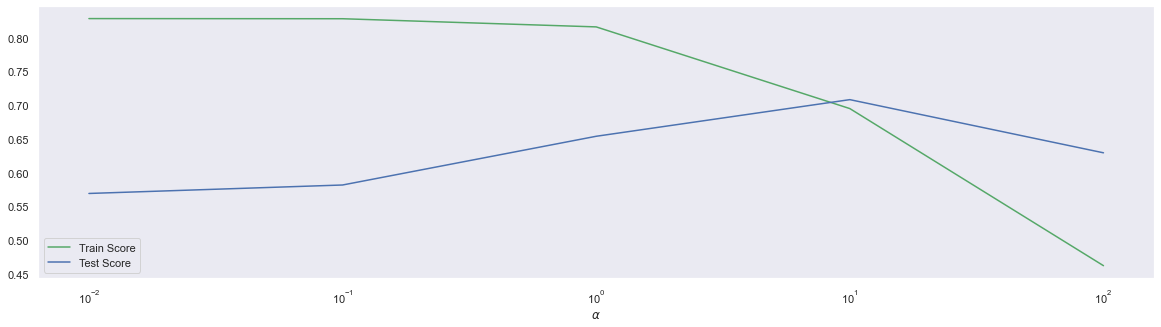

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt

x_range = [0.01, 0.1, 1, 10, 100]
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [90]:
print(train_score_list)
print(test_score_list)

[0.8283030715529907, 0.8280866586454241, 0.8159928430420808, 0.6949274665784662, 0.46212103815797756]
[0.5691385097716156, 0.5816884379758648, 0.6538972950916553, 0.7081885080425168, 0.6293916346681871]


In [91]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.8283
Test score: 0.5691


In [92]:
## Grid Search for paramater tuning
params = {'alpha': [1000,100,10,1,0.1,0.01,0.001]}

#cross validation with 5 folds
model2 = GridSearchCV(Ridge(), params, cv=5)
model2.fit(X_train,y_train)

print ("Train Score:",model2.score(X_train, y_train))
print ("Test Score :",model2.score(X_test, y_test))
print("Best_parameters:",model2.best_params_)
print('Best score {:.4f}'.format(model2.best_score_))

Train Score: 0.8159928430420808
Test Score : 0.6538972950916553
Best_parameters: {'alpha': 1}
Best score 0.7590


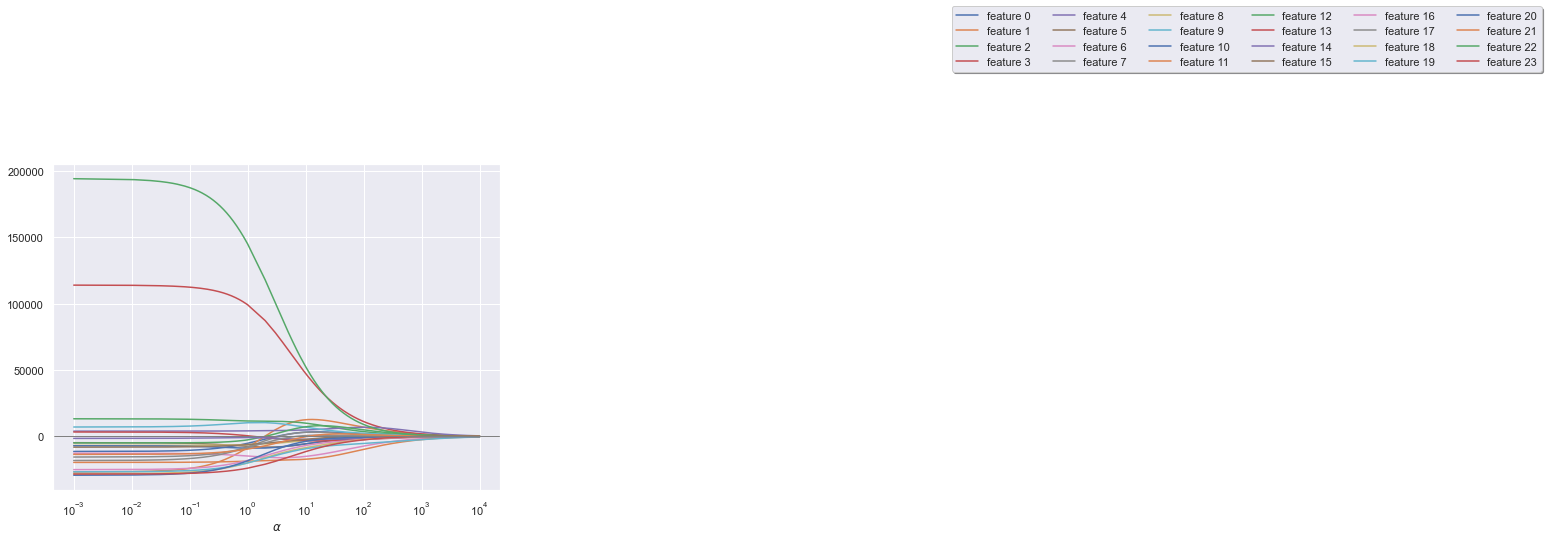

In [93]:
#Feature Selection
sns.set(rc={'figure.figsize':(8,6)})
x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,24):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.rcParams["figure.figsize"] = (6,4)
plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper left', bbox_to_anchor=(2, 1.5),
          ncol=6, fancybox=True, shadow=True)
plt.show()

In [100]:
#Model with best parameters
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)

#predict target variable in test data
ridge_pred=ridge.predict(X_test)

# Cross Validation
cv_scores = cross_val_score(ridge, X_train, y_train,cv = 5)
cv_test_scores = cross_val_score(ridge, X_test, y_test,cv = 5)

#Mean cross validation scores
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))

Mean cross-validation training score (5-fold): 0.7590
Mean cross-validation testing score (5-fold): 0.7456
Root Mean Squared Error: 19.224361209986082


# Polynomial Regression

In [104]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg = LinearRegression()

In [105]:
lreg.fit(X_train_poly, y_train)
print('%f'%lreg.score(X_train_poly, y_train))
print('%f'%lreg.score(X_test_poly, y_test))

0.988684
-8536824552463063.000000


In [107]:
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))
param = {'polynomialfeatures__degree': np.arange(3)}
model3 = GridSearchCV(PolynomialRegression(), param, cv=5, scoring='neg_mean_squared_error')
model3.fit(X_train, y_train)
best = model3.best_params_
print(model3.best_params_)

C:\Users\lxk200008\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lxk200008\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lxk200008\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\lxk200008\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\lxk200008\Anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\lxk200008\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, 

{'polynomialfeatures__degree': 2}


In [143]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg1 = LinearRegression()
lreg1.fit(X_train_poly, y_train)
pred_poly=lreg1.predict(X_test_poly)
print('Train score: {}'.format(lreg1.score(X_train_poly, y_train)))
print('Test score: {}'.format(lreg1.score(X_test_poly,y_test)))


Train score: 0.9886835691795695
Test score: -8536824552463063.0


In [115]:
cv_scores = cross_val_score(lreg, X_train_poly, y_train,cv = 5)
cv_test_scores = cross_val_score(lreg, X_test_poly, y_test,cv = 5)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))

Mean cross-validation training score (5-fold): -23899840096519680.0000
Mean cross-validation testing score (5-fold): -29.4593


Polynomial regression seems inappropriate with incorrect test scores, RMSE and cross validation scores

# KNN Regression

Text(0, 0.5, 'MSE')

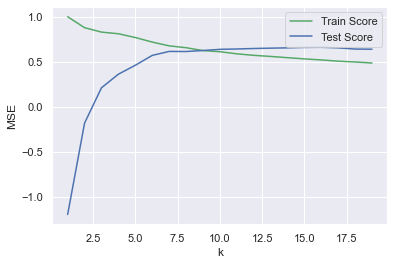

In [116]:
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []
for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))
x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [124]:
model4= KNeighborsRegressor(8)
model4.fit(X_train, y_train)
print('Train score: {:.4f}'.format(model4.score(X_train, y_train)))
print('Test score: {:.4f}'.format(model4.score(X_test, y_test)))

Train score: 0.6555
Test score: 0.6131


In [117]:
#Grid Search for tuning parameters
params = {'n_neighbors':range(1,15),'weights': ['distance','uniform']}
model = GridSearchCV(knn_reg, params)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [154]:
#Cross validation
knnr = KNeighborsRegressor(n_neighbors = 3, weights = 'distance')
knnr.fit(X_train, y_train)
knnr_pred=knnr.predict(X_test)

print('Train score: {}'.format(knnr.score(X_train, y_train)))
print('Test score: {}'.format(knnr.score(X_test,y_test)))

cv_scores = cross_val_score(knnr, X_train, y_train,cv = 5)
cv_test_scores = cross_val_score(knnr, X_test, y_test,cv = 5)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))

Train score: 1.0
Test score: 0.2448023064004129
Mean cross-validation training score (5-fold): 0.6915
Mean cross-validation testing score (5-fold): 0.4433


# SGD Regression

In [125]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state= 0, max_iter = 1000, learning_rate = 'constant', eta0 = 0.05, shuffle = False)
sgd.fit(X_train, y_train)
print(sgd.score(X_train, y_train))
print(sgd.score(X_test, y_test))

0.8045342846309248
0.5650347553008694


C:\Users\lxk200008\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [142]:
sgd = SGDRegressor(alpha= 0.0001, learning_rate= 'optimal', loss= 'epsilon_insensitive', max_iter= 10000, penalty= 'l1', tol= 0.0001)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
#Train and Test score
print('Train score: {}'.format(sgd.score(X_train, y_train)))
print('Test score: {}'.format(sgd.score(X_test,y_test)))
# Average Cross Validation scores
cv_scores = cross_val_score(sgd, X_train, y_train,cv = 5)
cv_test_scores = cross_val_score(sgd,X_test, y_test,cv = 5)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))


C:\Users\lxk200008\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Train score: 0.28130866591857273
Test score: 0.5502649900092689


C:\Users\lxk200008\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\lxk200008\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\lxk200008\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\lxk200008\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration

Mean cross-validation training score (5-fold): 0.3621
Mean cross-validation testing score (5-fold): 0.5051


C:\Users\lxk200008\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


# Decision Tree Regressor

In [128]:
from sklearn.tree import DecisionTreeRegressor
train_accuracy_score_dtr=[]
test_accuracy_score_dtr=[]

depth=[2,3,5,10,25]
for i in depth:
    
    dtr=DecisionTreeRegressor(max_depth=i,random_state=0)
    dtr.fit(X_train,y_train)
    train_accuracy_score_dtr.append(dtr.score(X_train,y_train))
    test_accuracy_score_dtr.append(dtr.score(X_test,y_test))

Text(0, 0.5, 'Accuracy')

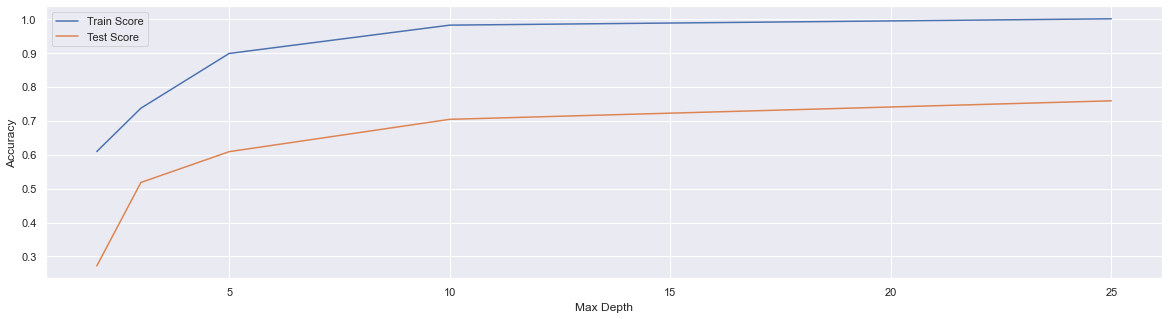

In [129]:
plt.subplots(figsize=(20,5))
plt.plot(depth, train_accuracy_score_dtr, label="Train Score")
plt.plot(depth, test_accuracy_score_dtr, label="Test Score")
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")

In [130]:
dtr_max2 = DecisionTreeRegressor(random_state=0, max_depth=2)
dtr_max2.fit(X_train,y_train)
dtr_max2.score(X_test,y_test)

0.27231001898685203

In [155]:
dtr_max2.score(X_train,y_train)

0.6091367101453469

# Simple SVM

In [131]:
#### Linear SVR
from sklearn.svm import LinearSVR
li_svc = LinearSVR()
li_svc.fit(X_train,y_train)
print(li_svc.score(X_train, y_train))
print(li_svc.score(X_test, y_test))

-0.956980191745384
-1.7501318363301257


In [132]:
# Grid search
from sklearn.model_selection import GridSearchCV
param_linear = [{'C': [0.001,0.01,1,10]}]
li_svc = GridSearchCV(estimator=LinearSVR(), param_grid=param_linear, n_jobs=-1,cv=3)
li_svc.fit(X_train, y_train)
pred_li_svc=li_svc.predict(X_train, y_train)
# Best score
print('Best score:', li_svc.best_score_)
# Best parameters
print('Best C:',li_svc.best_estimator_.C)

Best score: -3.0670037728872317
Best C: 10


In [133]:
#Model with best parameters
li_svc1 = LinearSVR(C=10)
li_svc1.fit(X_train, y_train)
pred_li_svc1=li_svc1.predict(X_test)
print('Train score: {}'.format(li_svc1.score(X_train, y_train)))
print('Test score: {}'.format(li_svc1.score(X_test,y_test)))

Train score: 0.03915171319844324
Test score: 0.13624250832616724


In [134]:
# Cross Validation
cv_scores = cross_val_score(li_svc1, X_train, y_train,cv = 3)
cv_test_scores = cross_val_score(li_svc1, X_test, y_test,cv = 3)
#Average corss validation scores
print('Mean cross-validation training score (3-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (3-fold): {:.4f}'.format(np.mean(cv_test_scores)))

Mean cross-validation training score (3-fold): -0.0585
Mean cross-validation testing score (3-fold): -0.8550


# SVM with kernel Linear

In [135]:
from sklearn import svm
from sklearn.svm import SVR
param = [{'C': [0.001,0.01,1, 10],'gamma': [0.001, 0.01,0.1,1],'epsilon':[0.1,0.2,0.5,0.3]}]
svm_klf = GridSearchCV(estimator=svm.SVR(kernel='linear'), param_grid=param, n_jobs=-1,cv=3)
svm_klf.fit(X_train, y_train)   
#Best parameters
print('Best C:',svm_klf.best_estimator_.C) 
print('Best Gamma:',svm_klf.best_estimator_.gamma)
print('Best Epsilon:',svm_klf.best_estimator_.epsilon)
best = [svm_klf.best_estimator_]

Best C: 0.001
Best Gamma: 0.001
Best Epsilon: 0.1


In [136]:
#Model with best parameters
svm_klf = SVR(kernel = 'linear', gamma =0.001,C=0.001,epsilon = 0.1 )
svm_klf.fit(X_train, y_train)
pred_svm_klf=svm_klf.predict(X_test)

print('Train score: {}'.format(svm_klf.score(X_train, y_train)))
print('Test score: {}'.format(svm_klf.score(X_test,y_test)))

#Cross Validation
cv_scores = cross_val_score(svm_klf, X_train, y_train,cv = 5)
cv_test_scores = cross_val_score(svm_klf, X_test, y_test,cv = 5)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))

Train score: -0.026256464887366215
Test score: -0.03261639784425974
Mean cross-validation training score (5-fold): -0.0306
Mean cross-validation testing score (5-fold): -0.0375


# SVM with Kernel Poly

In [137]:
from sklearn import svm
poly = [{'C': [0.001,0.01,1, 10],'gamma': [0.001, 0.01,0.1,1],'epsilon':[0.1,0.2,0.5,0.3]}]
svm_poly = GridSearchCV(estimator=svm.SVR(kernel='poly'), param_grid= poly, n_jobs=-1,cv=3)
svm_poly.fit(X_train, y_train)   
#best score
print('Best score', svm_poly.best_score_) 

# Best parameters
print('Best C:',svm_poly.best_estimator_.C) 
print('Best Gamma:',svm_poly.best_estimator_.gamma)
print('Best Epsilon:',svm_poly.best_estimator_.epsilon)
best = [svm_poly.best_estimator_]

Best score 0.4955817025722262
Best C: 10
Best Gamma: 1
Best Epsilon: 0.5


In [138]:
#Model with best parameters
svm_poly = SVR(kernel = 'poly', gamma =1,C=10,epsilon = 0.5 )
svm_poly.fit(X_train, y_train)
pred_svm_poly=svm_poly.predict(X_test)
print('Train score: {}'.format(svm_poly.score(X_train, y_train)))
print('Test score: {}'.format(svm_poly.score(X_test,y_test)))

#Cross Validation
cv_scores = cross_val_score(svm_poly, X_train, y_train,cv = 5)
cv_test_scores = cross_val_score(svm_poly, X_test, y_test,cv = 5)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))

Train score: 0.5322526181759912
Test score: 0.7992511281616599
Mean cross-validation training score (5-fold): 0.5699
Mean cross-validation testing score (5-fold): 0.6431


# SVM with Kernel rbf

In [139]:
from sklearn import svm
rbf = [{'C': [0.001,0.01,1, 10],'gamma': [0.001, 0.01,0.1,1],'epsilon':[0.1,0.2,0.5,0.3]}]
rbf = GridSearchCV(estimator=svm.SVR(kernel='rbf'), param_grid=rbf, n_jobs=-1,cv=3)
rbf.fit(X_train, y_train)   
# Best score
print('Best score', rbf.best_score_) 

# View the best parameters for the model found using grid search
print('Best C:',rbf.best_estimator_.C) 
print('Best Gamma:',rbf.best_estimator_.gamma)
print('Best Epsilon:',rbf.best_estimator_.epsilon)
best = [rbf.best_estimator_]

Best score -0.016420081184955453
Best C: 10
Best Gamma: 0.1
Best Epsilon: 0.5


In [140]:
rbf= SVR(kernel = 'rbf', gamma =0.1,C=10,epsilon = 0.5)
rbf.fit(X_train, y_train)
pred_rbf=rbf.predict(X_test)
print('Train score: {}'.format(rbf.score(X_train, y_train)))
print('Test score: {}'.format(rbf.score(X_test,y_test)))

#Cross Validation
cv_scores = cross_val_score(rbf, X_train, y_train,cv = 5)
cv_test_scores = cross_val_score(rbf, X_test, y_test,cv = 5)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))


Train score: -0.006676091956987262
Test score: 0.00510927999387456
Mean cross-validation training score (5-fold): -0.0105
Mean cross-validation testing score (5-fold): -0.0274


# Train and Test scores of different models.

    Linear Regression
train:  0.8283053922174043
test:  -3.0051744001610107e+18
 
    Lasso Regression
Train Score: 0.7961359742449912
Test Score : 0.6520740310554958    
     
     Ridge Regression
Train Score: 0.8159928430420808
Test Score : 0.6538972950916553

    Polynomial
Train score: 0.9886835691795695
Test score: -8536824552463063.0

    KNN
Train score: 1.0
Test score: 0.2448023064004129
    
    Decision Tree
 
Train : 0.6091367101453469
Test 0.27231001898685203
    
 
    SGD
Train score: 0.28130866591857273
Test score: 0.5502649900092689
    
    SVM
Train score: 0.03915171319844324
Test score: 0.13624250832616724
    
    SVM Linear
Train score: -0.026256464887366215
Test score: -0.03261639784425974
    
    SVM Poly
Train score: 0.5322526181759912
Test score: 0.7992511281616599
    
    SVM rbf
Train score: -0.006676091956987262
Test score: 0.00510927999387456

   
   

Based on train and test accuracies  and least RMSE value, Lasso Regression is the best model

In [157]:
#Predicted price for the best model
y_pred = lasso.predict(X_test)
y_pred

array([ 30519.2994828 ,  20773.52717945,  48224.29336163,  32137.23808929,
        13892.94882604,  16501.26888302,  38107.38062245,  34022.35647643,
        42147.93226198,  46410.39406365,   2439.63605235,  23792.88542283,
        29291.25594228,  31800.72268587,  22339.14234474,  17219.1260671 ,
        53770.24964739,  29628.73410756,  33290.52077611,  31684.23453208,
        36201.04624409,  59606.17831918,  36261.55821123,  42159.17401659,
        36730.12085286,  30849.16035416,  17319.97085174,  37669.97168372,
        26076.93886207,  33529.00664618,  45697.63873263,  31571.6052075 ,
         3474.60552248,  11772.42811617,  41423.45652545,  44915.2572807 ,
         3188.30486257,  16264.75342982,  11612.3200368 ,  33832.17778654,
        46024.46594879,  44871.83402394,  19070.92512451,  24648.57230721,
        17121.94310322,  13879.33242486,  48143.57063022,  57859.02911241,
        61992.91229712,  15559.6458064 ,  19941.42538906,  55801.62726903,
        15502.52595884,  